original image entropy is :  [-1.6722421e+08]
image with noise entropy is :  [-1.6953437e+08]


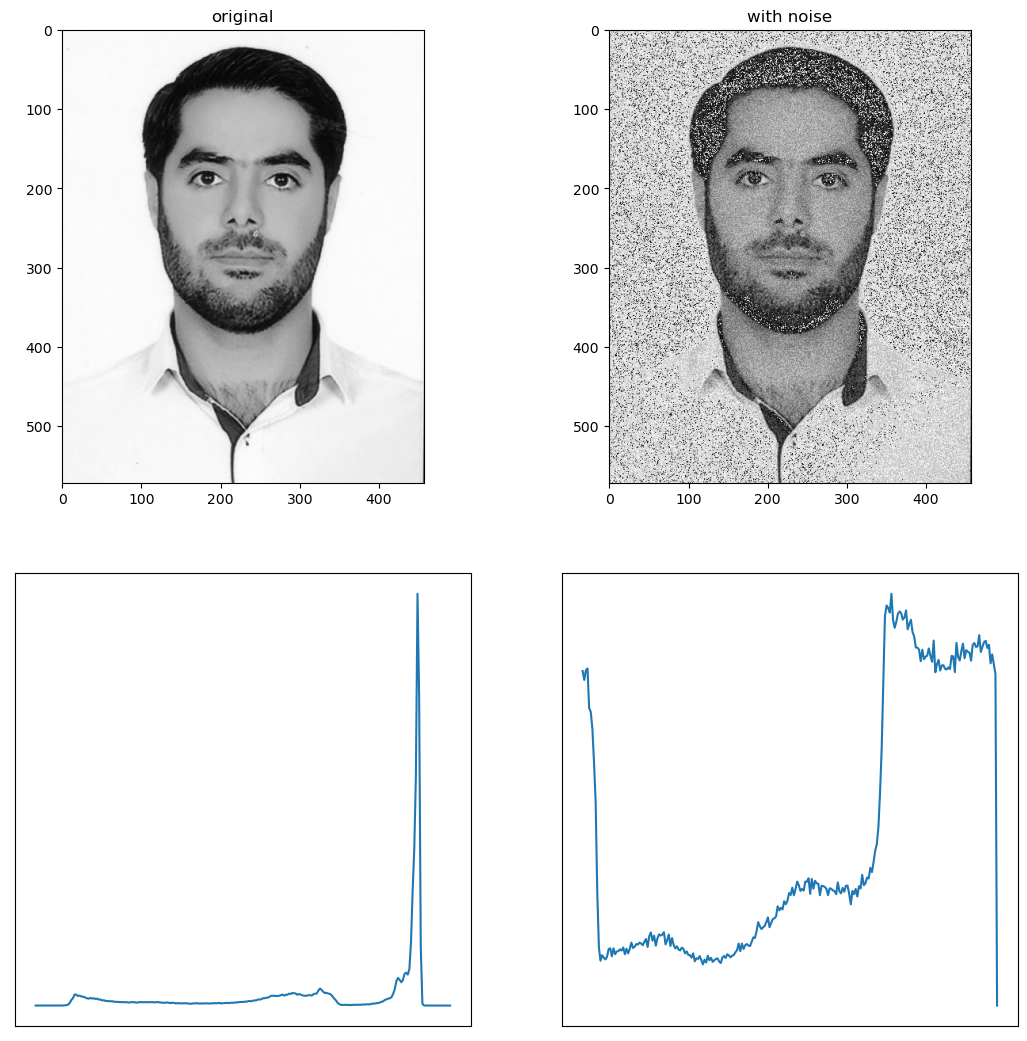

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#-------------------------------------------- original image --------------------------------------------
image=cv.imread('sam.jpg',0)
plt.figure(figsize=(20,20))

plt.subplot(331)
plt.imshow(image,cmap='gray')
plt.title('original')

hist=cv.calcHist([image],[0],None,[256],[0,255])
plt.subplot(334)
plt.plot(hist)
plt.xticks([])
plt.yticks([])

#-------------------------------------------- image with noise --------------------------------------------
row , col=image.shape
image_noise=image.copy()
for i in range(row):
    for j in range(col):
        image_noise[i,j]=image[i,j]+np.random.randint(-50,30)
plt.subplot(332)
plt.imshow(image_noise,cmap='gray')
plt.title('with noise')
#plt.imsave('new.jpg',new_image,cmap='gray')

hist_noise=cv.calcHist([image_noise],[0],None,[256],[0,255])
plt.subplot(335)
plt.plot(hist_noise)
plt.xticks([])
plt.yticks([])

#------------------------------------ calculate entropy originale image ------------------------------------
#print(hist.shape)
elms=hist.size
p=hist.copy()

for i in range(elms):
    p[i]=hist[i]/(row*col)
#print(sum(p))    
entropy=hist.copy()
for i in range(elms):
    if p[i]!= 0:
        entropy[i]=hist[i]*(1/p[i])* (np.log10(p[i]))
    else:
        entropy[i]=0
print('original image entropy is : ',sum(entropy))

#------------------------------------- calculate entropy image with noise -----------------------------------
elms2=hist_noise.size
p2=hist_noise.copy()

for i in range(elms2):
    p2[i]=hist_noise[i]/(row*col)
#print(sum(p))    
entropy2=hist_noise.copy()
for i in range(elms2):
    if p2[i]!= 0:
        entropy2[i]=hist_noise[i]*(1/p2[i])* (np.log10(p2[i]))
    else:
        entropy2[i]=0
print('image with noise entropy is : ',sum(entropy2))